# **Namish Rathy**

# **E23CSEU0608**

# Objective:

To enhance the generalization capability and performance of Convolutional Neural
Networks (CNNs) through the implementation of Data Augmentation, Dropout
Regularization, and Weight Regularization techniques on the CIFAR-10 dataset. Students
will gain hands-on experience in building robust deep learning models and avoiding
overfitting.

# Imports

In [20]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
import keras

print(tf.__version__)

2.19.0


In [21]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Data Preprocessing


0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [23]:
print(f"Training set shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test set shape: {x_test.shape}, Labels: {y_test.shape}")

Training set shape: (50000, 32, 32, 3), Labels: (50000, 1)
Test set shape: (10000, 32, 32, 3), Labels: (10000, 1)


# Check for NA Values

In [24]:
missing_values_train = np.isnan(x_train).sum()
missing_values_test = np.isnan(x_test).sum()
print(f"\nMissing values in training set: {missing_values_train}")
print(f"Missing values in test set: {missing_values_test}")


Missing values in training set: 0
Missing values in test set: 0


# Data Visualization

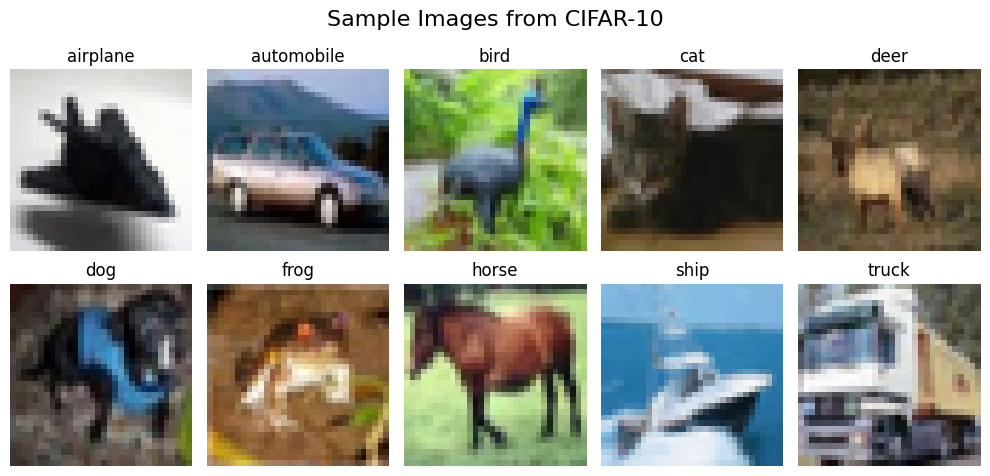

In [25]:
plt.figure(figsize=(10, 5))
for i in range(10):
    idx = np.where(y_train.flatten() == i)[0][0]
    img = x_train[idx]
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(class_names[i])
    plt.axis('off')

plt.suptitle("Sample Images from CIFAR-10", fontsize=16)
plt.tight_layout()
plt.show()


# Normalization

In [26]:
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0


# One-Hot Encoding

In [27]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test,  num_classes=10)


# Splitting Data

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True)

# Horizontal Flip

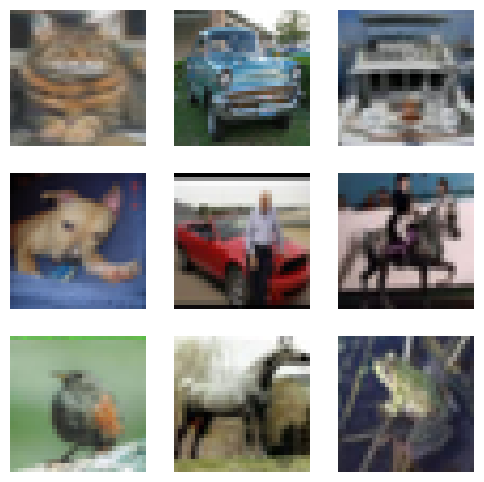

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

flip_gen = ImageDataGenerator(horizontal_flip=True)

images, _ = next(flip_gen.flow(x_train, y_train, batch_size=9, shuffle=True))

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()


# Resizing

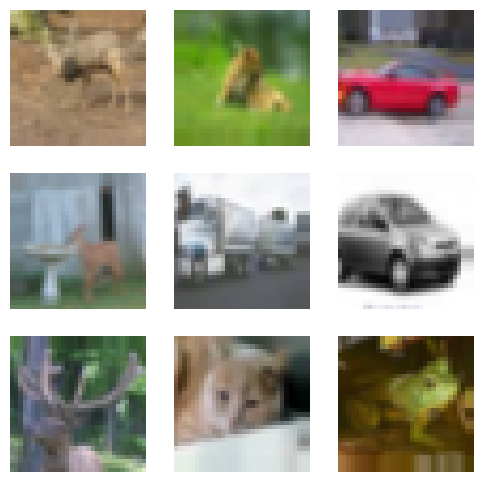

In [30]:
shift_gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)

images, _ = next(shift_gen.flow(x_train, y_train, batch_size=9, shuffle=True))

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()


# Zoom

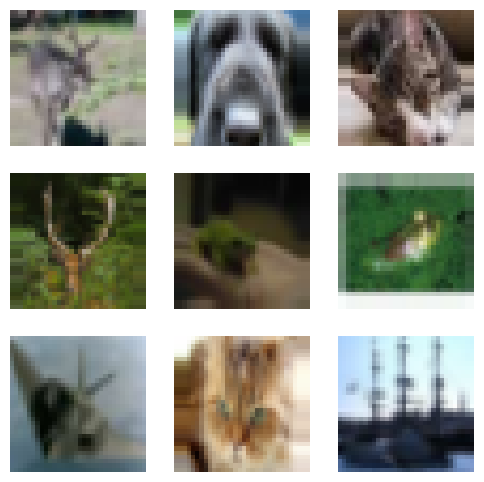

In [31]:
zoom_gen = ImageDataGenerator(zoom_range=0.2)

images, _ = next(zoom_gen.flow(x_train, y_train, batch_size=9, shuffle=True))

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()


# Rotation

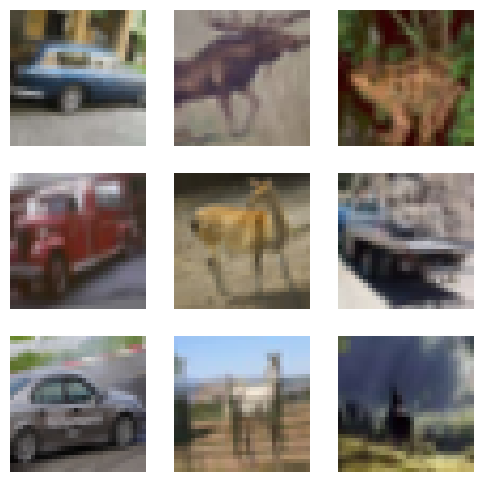

In [32]:
rotate_gen = ImageDataGenerator(rotation_range=15)

images, _ = next(rotate_gen.flow(x_train, y_train, batch_size=9, shuffle=True))

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

# VGG Model

In [33]:
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

l2_reg = regularizers.l2(0.001)

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same',
                        kernel_initializer='he_normal', kernel_regularizer=l2_reg,
                        input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same',
                        kernel_initializer='he_normal', kernel_regularizer=l2_reg))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same',
                        kernel_initializer='he_normal', kernel_regularizer=l2_reg))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same',
                        kernel_initializer='he_normal', kernel_regularizer=l2_reg))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same',
                        kernel_initializer='he_normal', kernel_regularizer=l2_reg))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same',
                        kernel_initializer='he_normal', kernel_regularizer=l2_reg))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal',
                       kernel_regularizer=l2_reg))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

opt = optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.01/40)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

# Model Training

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    rotation_range=15
)

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_cnn_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(
    train_generator,
    epochs=40,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, checkpoint]
)


Epoch 1/40
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7088 - loss: 1.2141

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.7088 - loss: 1.2141 - val_accuracy: 0.7443 - val_loss: 1.1374
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7165 - loss: 1.2022 - val_accuracy: 0.6918 - val_loss: 1.2925
Epoch 3/40
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7104 - loss: 1.2132

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7105 - loss: 1.2132 - val_accuracy: 0.7486 - val_loss: 1.1234
Epoch 4/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7226 - loss: 1.1979 - val_accuracy: 0.6786 - val_loss: 1.2967
Epoch 5/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7125 - loss: 1.2149 - val_accuracy: 0.7449 - val_loss: 1.1416
Epoch 6/40
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7183 - loss: 1.2037

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7183 - loss: 1.2037 - val_accuracy: 0.7571 - val_loss: 1.1113
Epoch 7/40
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7239 - loss: 1.1995

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.7239 - loss: 1.1995 - val_accuracy: 0.7849 - val_loss: 1.0298
Epoch 8/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7241 - loss: 1.1945 - val_accuracy: 0.7713 - val_loss: 1.0755
Epoch 9/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7238 - loss: 1.1964 - val_accuracy: 0.7046 - val_loss: 1.2674
Epoch 10/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7281 - loss: 1.1931 - val_accuracy: 0.7564 - val_loss: 1.1103
Epoch 11/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7296 - loss: 1.1947 - val_accuracy: 0.7576 - val_loss: 1.0956
Epoch 12/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7272 - loss: 1.1895 - val_accuracy: 0.7696 - val_loss: 1.0613


# Test Accuracy

In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predict classes
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

Test Accuracy: 0.7783
Test Loss: 1.0415
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# Confusion Matrix

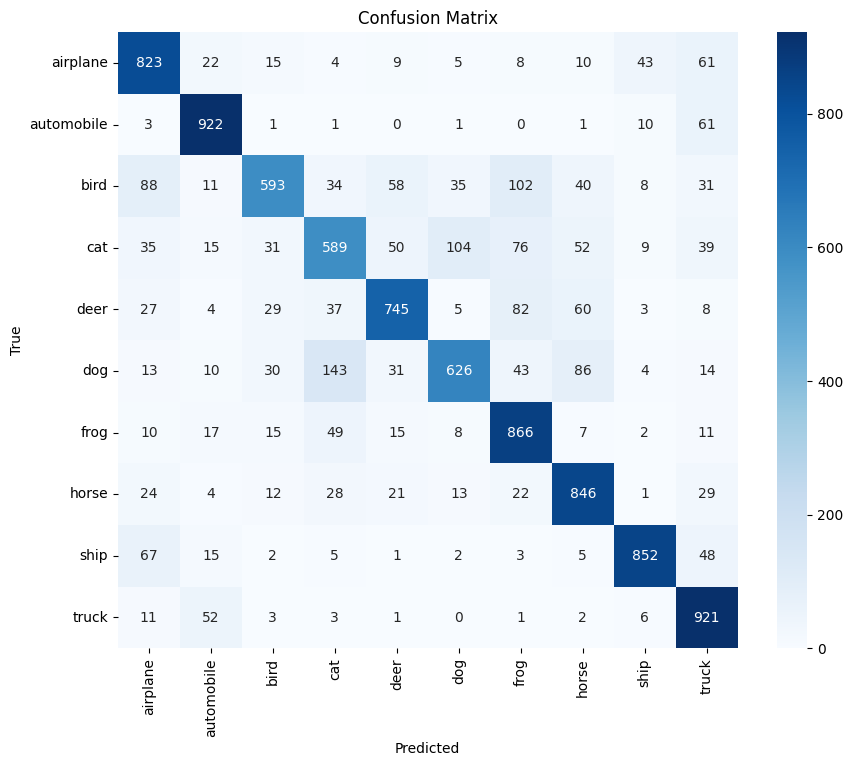

In [39]:
cm = confusion_matrix(y_true, y_pred)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Model Report

In [40]:
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.75      0.82      0.78      1000
  automobile       0.86      0.92      0.89      1000
        bird       0.81      0.59      0.69      1000
         cat       0.66      0.59      0.62      1000
        deer       0.80      0.74      0.77      1000
         dog       0.78      0.63      0.70      1000
        frog       0.72      0.87      0.79      1000
       horse       0.76      0.85      0.80      1000
        ship       0.91      0.85      0.88      1000
       truck       0.75      0.92      0.83      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.78      0.78      0.77     10000



# Performance Evaluation

In [41]:
from tensorflow.keras import layers, models, regularizers

def build_model(use_dropout=False, use_l2=False):
    reg = regularizers.l2(0.001) if use_l2 else None

    model = models.Sequential()


    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                            kernel_initializer='he_normal', kernel_regularizer=reg, input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                            kernel_initializer='he_normal', kernel_regularizer=reg))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    if use_dropout:
        model.add(layers.Dropout(0.2))


    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                            kernel_initializer='he_normal', kernel_regularizer=reg))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                            kernel_initializer='he_normal', kernel_regularizer=reg))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    if use_dropout:
        model.add(layers.Dropout(0.3))


    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=reg))
    if use_dropout:
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))


    from tensorflow.keras.optimizers import SGD
    opt = SGD(learning_rate=0.01, momentum=0.9, decay=1e-4)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug_gen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    rotation_range=15
)


In [43]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def train_model(model, use_aug=False):
    es = EarlyStopping(patience=5, restore_best_weights=True)
    if use_aug:
        history = model.fit(
            aug_gen.flow(x_train, y_train, batch_size=32),
            validation_data=(x_val, y_val),
            epochs=30,
            callbacks=[es],
            verbose=1
        )
    else:
        history = model.fit(
            x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=30,
            batch_size=32,
            callbacks=[es],
            verbose=1
        )
    return history


In [56]:
results = {}

configs = [
    ("M1", False, False, False),
    ("M2", True,  False, False),
    ("M3", False, True,  False),
    ("M4", True,  True,  False),
    ("M5", True,  True,  True),
    ("M6", False, False, True)
]

for name, do_drop, do_l2, do_aug in configs:
    print(f"\n=== Training {name} ===")
    model = build_model(use_dropout=do_drop, use_l2=do_l2)
    hist = train_model(model, use_aug=do_aug)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    results[name] = {"acc": test_acc, "loss": test_loss}



=== Training M1 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4210 - loss: 1.6734 - val_accuracy: 0.6108 - val_loss: 1.1407
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6673 - loss: 0.9578 - val_accuracy: 0.6929 - val_loss: 0.8885
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7539 - loss: 0.7068 - val_accuracy: 0.7058 - val_loss: 0.8472
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8054 - loss: 0.5584 - val_accuracy: 0.7279 - val_loss: 0.8313
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8555 - loss: 0.4201 - val_accuracy: 0.7028 - val_loss: 0.9927
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8893 - loss: 0.3130 - val_accuracy: 0.7265 - val_loss: 0.9439
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9209 - loss: 0.2274 - val_accuracy: 0.7289 - val_loss: 1.0391
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9394 - loss: 0.1752

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.1808 - loss: 2.9355 - val_accuracy: 0.3342 - val_loss: 2.2550
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.3032 - loss: 2.3438 - val_accuracy: 0.4842 - val_loss: 1.7914
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.4530 - loss: 1.8630 - val_accuracy: 0.5450 - val_loss: 1.5718
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.5186 - loss: 1.6470 - val_accuracy: 0.6366 - val_loss: 1.2787
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5620 - loss: 1.5434 - val_accuracy: 0.4947 - val_loss: 1.9787
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5766 - loss: 1.4840 - val_accuracy: 0.6518 - val_loss: 1.2614
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.5977 - loss: 1.4443 - val_accuracy: 0.6790 - val_loss: 1.2219
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.6028 - loss: 1.44

# M1 - M6

| Model | Dropout | L2 Reg | Data Augmentation |
| ----- | ------- | ------ | ----------------- |
| M1    | ❌       | ❌      | ❌                 |
| M2    | ✅       | ❌      | ❌                 |
| M3    | ❌       | ✅      | ❌                 |
| M4    | ✅       | ✅      | ❌                 |
| M5    | ✅       | ✅      | ✅                 |
| M6    | ❌       | ❌      | ✅                 |


In [57]:
import pandas as pd
df_results = pd.DataFrame(results).T
print(df_results)


       acc      loss
M1  0.7229  0.840700
M2  0.7875  0.663423
M3  0.7025  1.295021
M4  0.7430  1.165430
M5  0.6799  1.236403
M6  0.7852  0.636072


# Visual Comparison

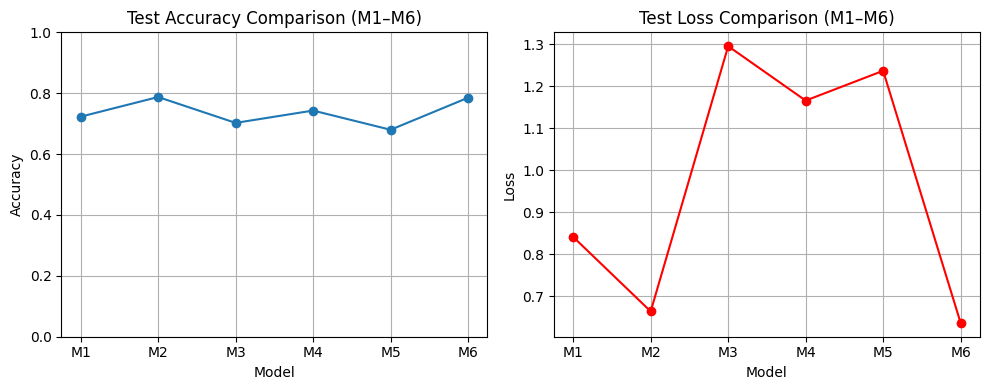

In [58]:
import matplotlib.pyplot as plt

model_names = list(results.keys())
acc_values = [results[m]["acc"] for m in model_names]
loss_values = [results[m]["loss"] for m in model_names]

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(model_names, acc_values, marker='o')
plt.title("Test Accuracy Comparison (M1–M6)")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(model_names, loss_values, marker='o', color='red')
plt.title("Test Loss Comparison (M1–M6)")
plt.xlabel("Model")
plt.ylabel("Loss")
plt.grid(True)

plt.tight_layout()
plt.show()


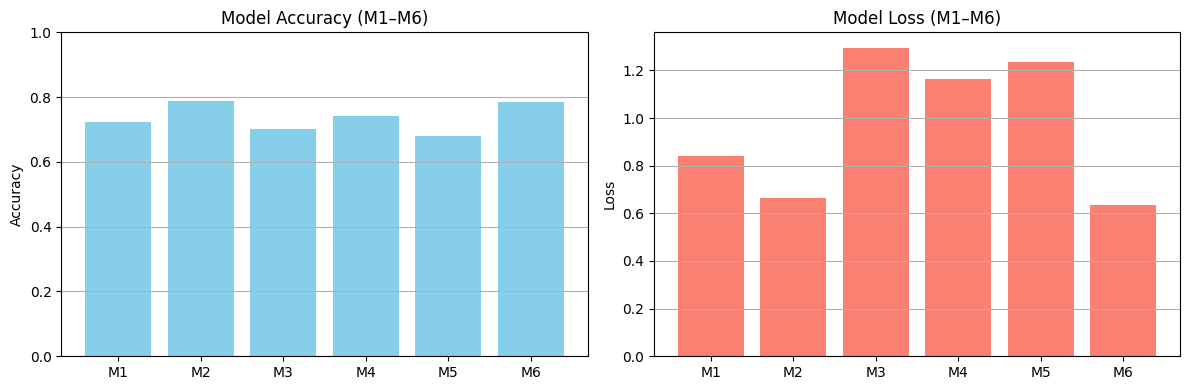

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.DataFrame(results).T
df.reset_index(inplace=True)
df.columns = ["Model", "Accuracy", "Loss"]

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.bar(df["Model"], df["Accuracy"], color='skyblue')
plt.ylim(0, 1)
plt.title("Model Accuracy (M1–M6)")
plt.ylabel("Accuracy")
plt.grid(axis='y')

plt.subplot(1, 2, 2)
plt.bar(df["Model"], df["Loss"], color='salmon')
plt.title("Model Loss (M1–M6)")
plt.ylabel("Loss")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# **Summary & Learnings**

---



1. Best Overall Model –

* M2 (Dropout only) achieved the highest accuracy 78.75% with lowest loss 0.6634, indicating strong regularization without overcomplicating the network.
* M6 (Data Augmentation only) was a close second in accuracy (78.52%) with
slightly lower loss (0.6361) — showing augmentation alone can be highly effective.


2. Effect of Dropout –

* Adding dropout significantly reduced overfitting, improving generalization in M2 compared to M1 (baseline).
* Higher dropout rates in later layers likely helped prevent co-adaptation of neurons.

3. Effect of L2 Regularization –

* Alone (M3), L2 regularization reduced accuracy to 70.25% with high loss (1.2950), suggesting it may be too aggressive without complementary methods.
* In combination with dropout (M4), it slightly improved over M3 but still underperformed compared to dropout alone.


4. Effect of Data Augmentation –

* M6 demonstrated augmentation can rival dropout in improving accuracy and lowering loss.
* When combined with both dropout and L2 (M5), accuracy dropped to 67.99%, indicating over-regularization and possible underfitting.


5. Class-Level Performance –

* Best performing classes: automobile (92% recall, 0.89 F1), ship (0.88 F1).
* Challenging classes: cat (0.62 F1), dog (0.70 F1) — often confused with each other due to visual similarity.


6. Key Takeaways –

* Moderate dropout and/or well-designed data augmentation can yield strong gains.
* Over-regularization (dropout + L2 + augmentation) may harm performance by reducing model capacity too much.
* Model tuning should balance regularization strength with the network’s ability to learn discriminative features.